# Car Brand Project with Transfer Learning

- Checking whether car belongs to 1 of the 3 classes (Lambo, Merc or Audi)

### Using ResNet50 

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# Resize all the images to this 

IMAGE_SIZE = [224,224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
folders

['Datasets/train/lamborghini',
 'Datasets/train/mercedes',
 'Datasets/train/audi']

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
# Setting up Number of Outputs to Predict
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 725 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 262 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
23/23 [==============================] - 43s 2s/step - loss: 3.2856 - accuracy: 0.4014 - val_loss: 1.4294 - val_accuracy: 0.5076
Epoch 2/10
23/23 [==============================] - 42s 2s/step - loss: 1.2546 - accuracy: 0.4786 - val_loss: 1.2545 - val_accuracy: 0.5038
Epoch 3/10
23/23 [==============================] - 42s 2s/step - loss: 0.9403 - accuracy: 0.5586 - val_loss: 1.1809 - val_accuracy: 0.5725
Epoch 4/10
23/23 [==============================] - 42s 2s/step - loss: 0.9078 - accuracy: 0.5972 - val_loss: 1.0338 - val_accuracy: 0.6031
Epoch 5/10
23/23 [==============================] - 42s 2s/step - loss: 0.9621 - accuracy: 0.5600 - val_loss: 0.9727 - val_accuracy: 0.6221
Epoch 6/10
23/23 [==============================] - 41s 2s/step - loss: 1.0673 - accuracy: 0.5503 - val_loss: 1.0570 - val_accuracy: 0.6450
Epoch 7/10
23/23 [==============================] - 42s 2s/step - loss: 0.7958 - acc

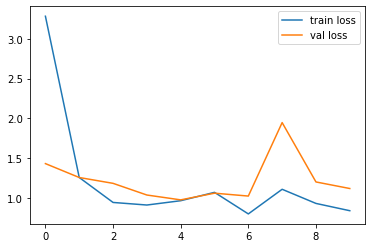

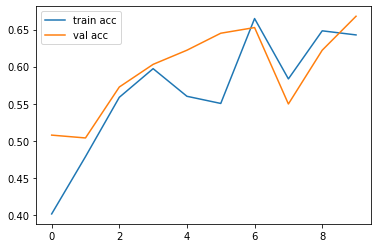

<Figure size 432x288 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [34]:
y_pred = model.predict(test_set)

In [35]:
y_pred[1]

array([9.9573863e-01, 2.3792607e-04, 4.0235445e-03], dtype=float32)

In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
y_pred

array([2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1,
       1, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 1,
       0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0])

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('model_resnet50.h5')

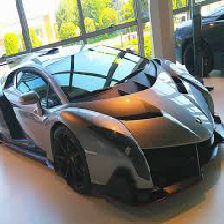

In [52]:
image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [53]:
img = image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [54]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [55]:
x.shape

(224, 224, 3)

In [56]:
x=x/255

In [57]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [58]:
model.predict(img_data)

array([[9.1879433e-01, 2.2625970e-07, 8.1205383e-02]], dtype=float32)

In [59]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([0])

In [60]:
a == 0

array([ True])

In [69]:
a == folders

array([ True])